In [2]:
import pandas as pd
import numpy as np
mag_wolff = pd.read_csv("mag_wolff_L.txt",header=None,sep="\t").to_numpy()[:,40000:-3]
ham_wolff = pd.read_csv("ham_wolff_L.txt",header=None,sep="\t").to_numpy()[:,40000:-3]
mean_mag_wolff = np.mean(np.abs(mag_wolff[:,:]/128**2),axis=1)

In [3]:
maxE = np.max(ham_wolff)
minE = np.min(ham_wolff)
betaNumb = 25
numbOfBins = 10000
binSize = (maxE-minE)/numbOfBins
histE = np.zeros((betaNumb,numbOfBins))
magOfE = np.zeros(numbOfBins)
test =0
for beta in range(betaNumb):
    
    # maxE = np.max(ham_wolff[beta,:])
    # minE = np.min(ham_wolff[beta,:])
    # binSize = (maxE-minE)/numbOfBins
    
    dataB = pd.DataFrame()
    dataB['energy'] = ham_wolff[beta,:]
    dataB['mag'] = np.abs(mag_wolff[beta,:])
    dataB.sort_values(by='energy',axis=0,inplace=True,ignore_index=True)
    bin = 0
    dataPoint = 0
    while (dataPoint < ham_wolff.shape[1]):
        test +=1
        if (dataB['energy'].loc[dataPoint]<=minE+(bin+1)*binSize):
            histE[beta,bin] +=1
            magOfE[bin] += dataB['mag'].loc[dataPoint]
            dataPoint += 1
        else:
            bin += 1
            
        

# magOfE = magOfE/np.sum(histE,axis=0)
print(dataPoint)
test


179998


4580537

In [4]:
autocorrData = pd.read_csv('autocorr.txt',header=None,sep='\t').to_numpy()
autocor = autocorrData[0,:]
autocorError = autocorrData[1,:]


In [75]:
print(dataB['energy'].head(5))
dataB['energy'].loc[ham_wolff.shape[1]-1]
minE

0   -30192.0
1   -30192.0
2   -30192.0
3   -30192.0
4   -30192.0
Name: energy, dtype: float64


-30192.0

In [ ]:
from scipy.special import logsumexp
N = ham_wolff.shape[0]
def preliminary_n(f):
    nE = np.zeros(numbOfBins)
    for i in range(numbOfBins):
        nE[i] = np.sum(histE[:,i]/autocor)/N/np.exp(logsumexp(a=-beta*(minE+i*binSize)+f,b=1/autocor))
    return nE

E = np.zeros(numbOfBins)
for i in range(numbOfBins):
    E[i] = minE + i*binSize

def find_rout(f):
    func= np.zeros(len(f))
    nE = preliminary_n(f)
    for bIdx in range(len(f)):
        func[bIdx] = np.exp(logsumexp(a=-beta[bIdx]*E,b= nE))-np.exp(-f[bIdx])
    return func








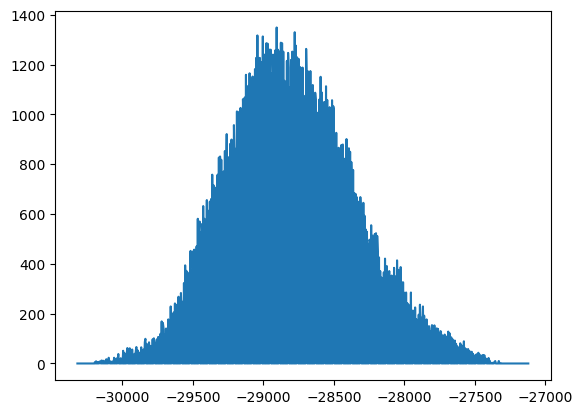

In [6]:
import matplotlib.pyplot as plt
# histE *=ham_wolff.shape[1]
start =int(33000/4)
end = int(36000/4)
fig, ax= plt.subplots(1,1)
ax.plot((minE+np.arange(numbOfBins)*binSize)[start:end],histE[2,start:end])
# plt.hist(ham_wolff[2,:],bins=200,density=False)
plt.show()

In [9]:
import numpy as np
import pandas as pd
data = np.zeros((6,2))
for i in range(6):
    for j in range(2):
        data[i,j] = np.random.rand()
data = pd.DataFrame(data)
print(data)
data.sort_values(by=0,axis=0)
dat = pd.DataFrame()
dat['energy'] = ham_wolff[0,:]
data[0].loc[4]

          0         1
0  0.532318  0.824516
1  0.385834  0.290721
2  0.296130  0.174957
3  0.777374  0.353448
4  0.120552  0.037528
5  0.314361  0.085951


0.1205519151589437